# Baseline Model & Evaluation

This notebook establishes baseline performance for predicting Revenue per User (RPU).

Starting with two methods:
* Dummy Regressor - predicts the mean of the target a naive benchmark.
* Linear Regression - sets a simple, interpretable baseline using numerical features.

These models help evaluate if advanced models such as Random Forest, XGBoost and Regularized Regression offer real improvement.

Evaluation Metrics include **R^2 Score** and **Mean Squared Error(MSE)**.

1. **Dummy Regressor (Statistical Baseline)**

    Using DummyRegressor from sklearn.dummy, which predicts:

    - The mean of the target log_revenue_per_user for all test samples or
    - Other strategies like median or constant
    - Primary Target variable is: log_revenue_per_user

This gives a realistic no-skill baseline.

In [7]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load Processed Data

df = pd.read_csv("data/scaled_data_20250520_230548.csv")

In [13]:
# Describe the Imported Data

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             4989 non-null   object 
 1   platform                         4989 non-null   object 
 2   daily_active_users_dau           4989 non-null   int64  
 3   new_registrations                4989 non-null   int64  
 4   session_duration_minutes         4989 non-null   float64
 5   ingame_purchases_                4989 non-null   float64
 6   social_media_mentions            4989 non-null   int64  
 7   stream_viewership                4989 non-null   float64
 8   revenue_                         4989 non-null   float64
 9   top_genre                        4989 non-null   object 
 10  influencer_endorsements          4989 non-null   int64  
 11  revenue_per_user                 4989 non-null   float64
 12  log_revenue_per_user

,daily_active_users_dau,new_registrations,session_duration_minutes,ingame_purchases_,social_media_mentions,stream_viewership,revenue_,influencer_endorsements,revenue_per_user,log_revenue_per_user,log_revenue,scaled_daily_active_users_dau,scaled_session_duration_minutes,scaled_ingame_purchases_,scaled_revenue_per_user,scaled_log_revenue,scaled_social_media_mentions,scaled_stream_viewership,scaled_new_registrations
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,111071.252957,11106.669072,58.349332,52079.754650,5727.306875,59989.377645,70411.817171,0.416717,1.052323,0.583343,10.920957,0.532192,0.546127,0.467731,0.073507,0.706555,0.525262,0.434788,0.532210
std,51825.934921,5182.591086,21.826225,24831.727842,2435.780271,22887.182173,41996.191553,0.493065,1.456925,0.459888,0.771552,0.272915,0.237860,0.276078,0.104459,0.226999,0.270702,0.248919,0.272912
min,10009.000000,1000.000000,8.236262,10009.847567,1001.000000,20012.244966,5010.198644,0.000000,0.027095,0.026734,8.519430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67896.000000,6789.000000,40.586113,31312.560583,3797.000000,40175.212242,33134.929420,0.000000,0.284336,0.250242,10.408373,0.304832,0.352545,0.236842,0.018444,0.555747,0.310736,0.219291,0.304845
50%,117520.000000,11752.000000,56.503485,50127.674771,5927.000000,59670.764554,64279.959705,0.000000,0.584716,0.460405,11.071019,0.566151,0.526011,0.446028,0.039980,0.750704,0.547455,0.431323,0.566193
75%,153186.000000,15318.000000,75.941008,72301.012982,7701.000000,79328.227960,106563.117966,1.000000,1.144246,0.762788,11.576502,0.753968,0.737839,0.692550,0.080098,0.899423,0.744610,0.645115,0.753976
max,199907.000000,19990.000000,99.997146,99954.556507,9999.000000,111958.552918,149993.898008,1.000000,13.974442,2.706345,11.918357,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#-----------DummyRegressor Baseline----------

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Features to use for the baseline model
features = [
    'scaled_daily_active_users_dau',
    'scaled_session_duration_minutes',
    'scaled_new_registrations',
    'scaled_ingame_purchases_',
    'scaled_stream_viewership',
    'scaled_social_media_mentions'
]

X = df[features]

# Targets
y_log_revenue_per_user = df['log_revenue_per_user']

# Train-test split
X_train, X_test, y_revenue_per_user_train, y_revenue_per_user_test = train_test_split(
    X,y_log_revenue_per_user, test_size = 0.2, random_state = 42)

# Fit dummy model
baseline_model = DummyRegressor(strategy = 'mean')
baseline_model.fit(X_train, y_revenue_per_user_train)
baseline_model_preds = baseline_model.predict(X_test)

# Evaluate
baseline_model_mse = mean_squared_error(y_revenue_per_user_test, baseline_model_preds)
baseline_model_r2 = r2_score(y_revenue_per_user_test, baseline_model_preds)

print("Baseline Model Metrics(Statistical):")
print(f"R2 score: {baseline_model_r2:.4f}")
print(f"MSE: {baseline_model_mse:.4f}")

Baseline Model Metrics(Statistical):
R2 score: -0.0010
MSE: 0.2024


To benchmark our ability to predict monetization performance (log_revenue_per_user), we began with a DummayRegressor followed by a Linear Regression Model.

- The DummyRegressor always predicts the mean of the target variable (log_revenue_per_user), regardless of the input features.

    - R2 score ~ -0.001 - indicates that the dummy model performs worse than just predicting the average for all observations/
    - This baseline shpws that no feature relationships were learned.

2. **Baseline LinearRegression Model**

We'll use a LinearRegression Model with the goal of learning relationships between behavioral indicators and monetization.

- The LinearRegression Model predicted the log_revenue_per_user with the following scores
- R2 score ~ 0.464 shows the model captures ~46% of the variance in per use revenue.
- This is a significant improvement from the dummy baseline.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

                 Target       MSE  R2 Score
0  log_revenue_per_user  0.108282  0.464459


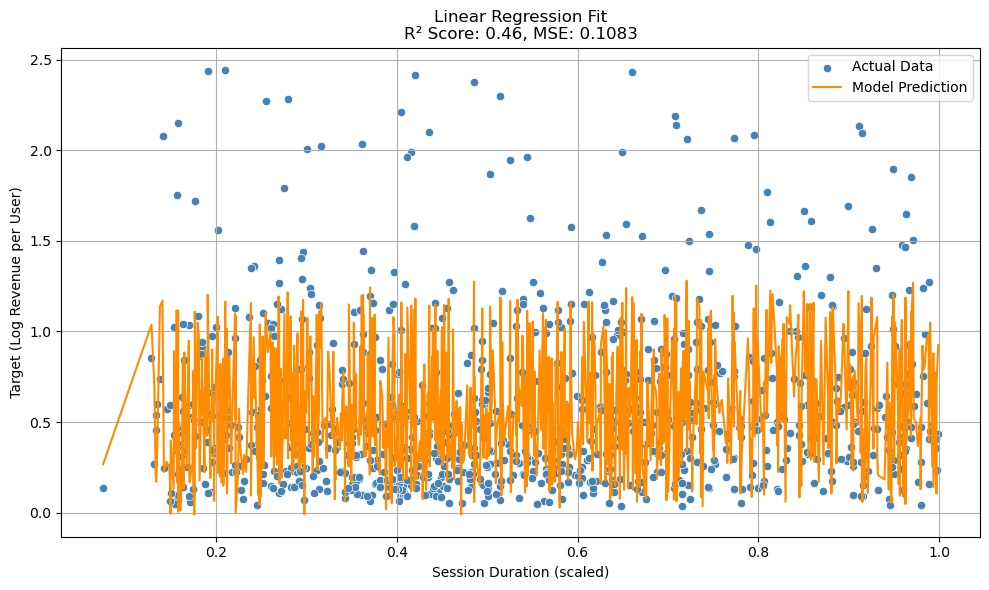

In [36]:
# Features to use for the baseline model
features = [
    'scaled_daily_active_users_dau',
    'scaled_session_duration_minutes',
    'scaled_new_registrations',
    'scaled_ingame_purchases_',
    'scaled_stream_viewership',
    'scaled_social_media_mentions'
]


X = df[features]

# Targets
y_log_revenue_per_user = df['log_revenue_per_user']

# Train-test split
X_train, X_test, y_revenue_per_user_train, y_revenue_per_user_test = train_test_split(
    X,y_log_revenue_per_user, test_size = 0.2, random_state = 42)

# Train baseline linear regression for log_revenue_per_user
model_revenue_per_user = LinearRegression()
model_revenue_per_user.fit(X_train, y_revenue_per_user_train)
y_revenue_per_user_preds = model_revenue_per_user.predict(X_test)

# Evaluate both models
revenue_per_user_mse = mean_squared_error(y_revenue_per_user_test, y_revenue_per_user_preds)
revenue_per_user_r2 = r2_score(y_revenue_per_user_test, y_revenue_per_user_preds)

comparison = pd.DataFrame({
    'Target' : ['log_revenue_per_user'],
    'MSE' : [revenue_per_user_mse],
    'R2 Score' : [revenue_per_user_r2]
})


print(comparison)

#Plot - Linear Regression Fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['scaled_session_duration_minutes'], y=y_revenue_per_user_test, label='Actual Data', color='steelblue')
sns.lineplot(x=X_test['scaled_session_duration_minutes'], y=y_revenue_per_user_preds, label='Model Prediction', color='darkorange')
plt.title(f"Linear Regression Fit\nR² Score: {revenue_per_user_r2:.2f}, MSE: {revenue_per_user_mse:.4f}")
plt.xlabel("Session Duration (scaled)")
plt.ylabel("Target (Log Revenue per User)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

1. **Linear Regression Fit**
* Blue dots (Actual Data): These are the real values of log_revenue_per_user across different session durations.
  * R2 score 0.46 means ~46% of the varialibity in log revenue per user is a moderate fit.

* Orange line (Model Predictions): These are predictions made by linear regression model, plotted against the same x-axis (scaled session duration).
  * Orange line Wiggle: Because the predictions are influenced by multiple features and not just session duration.

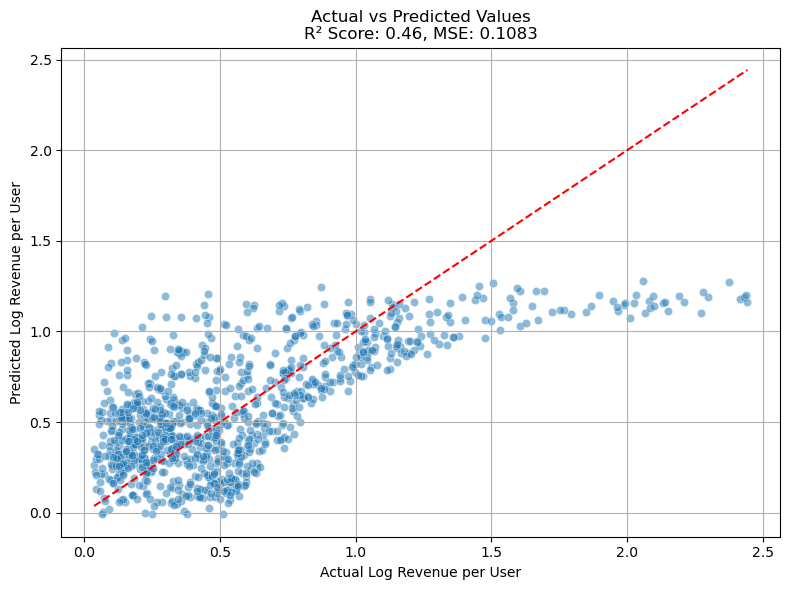

In [40]:
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_revenue_per_user_test, y=y_revenue_per_user_preds, alpha=0.5)
plt.plot([y_revenue_per_user_test.min(), y_revenue_per_user_test.max()],
         [y_revenue_per_user_test.min(), y_revenue_per_user_test.max()],
         '--', color='red')  # perfect prediction line
plt.xlabel('Actual Log Revenue per User')
plt.ylabel('Predicted Log Revenue per User')
plt.title(f'Actual vs Predicted Values\nR² Score: {revenue_per_user_r2:.2f}, MSE: {revenue_per_user_mse:.4f}')
plt.grid(True)
plt.tight_layout()
plt.show()

2. **Scatter Plot (Actual vs.Predicted):**
* Red Diagonal Line:
  * The ideal case where predictions perfectly match actual values.

* Clustered Velow the Line:
  * As majority of the points fall below the red line, especially for higher actual values, it means the model underpredicts revenue for high perorming games.

* Compression effect:
  * Predicted values are not spread out as the actual values (horizontal stretching vs. vertical compression).
  * This happens when linear models can't fully capture non-linear relationships.

* This calls for exploring non-linear models such as Random Fores, XGBoost to improve prediction for the top or bottom performers.

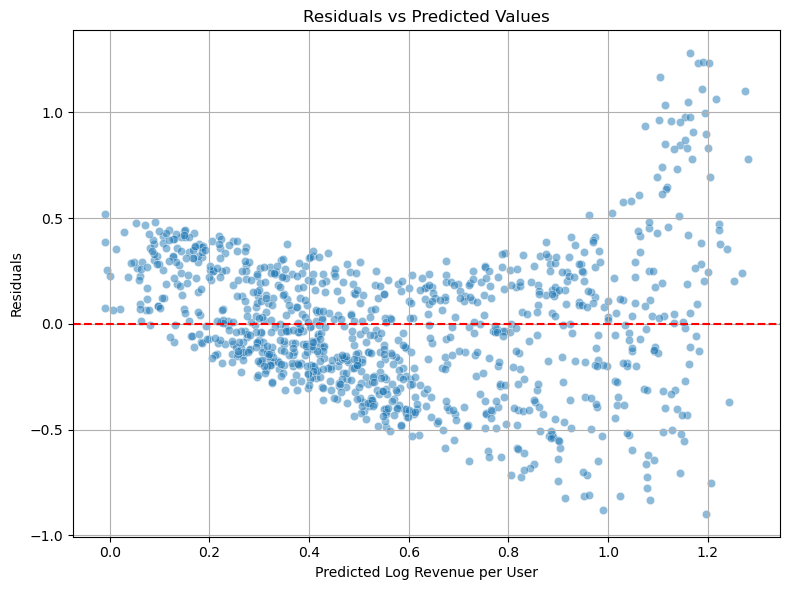

In [42]:
# Residual Plot (to understand bias and variance)
residuals = y_revenue_per_user_test - y_revenue_per_user_preds
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_revenue_per_user_preds, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Log Revenue per User')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

3. **Residual Plot (understand bias and variance):**
* Curvature and Funneling:
  * SLight Ushape pattern, indicating that linear model may be underfitting the true relationship, as it cannot capture non-linear dynamics well.
  * Residual variance increases as predictions increase, which is a sign of heteroscedasticity, in which case the error is not consistent across predictions.
  * The trends suggests that non-linear models likee Random Forest or XGBoost might do better at
    * Capturing non-linear interactions session_duration_in_minutes and DAU along with platform, genre and enagagement_level.